In [68]:
import pandas as pd
import numpy as np

In [108]:
File = pd.read_csv('/content/AB_Test_Results-_2_-_1_.csv')
File

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


from matplotlib import pyplot as plt
File['USER_ID'].plot(kind='hist', bins=20, title='USER_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
File['REVENUE'].plot(kind='hist', bins=20, title='REVENUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
File.groupby('VARIANT_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
File.plot(kind='scatter', x='USER_ID', y='REVENUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
File['USER_ID'].plot(kind='line', figsize=(8, 4), title='USER_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
File['REVENUE'].plot(kind='line', figsize=(8, 4), title='REVENUE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(File['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(File, x='USER_ID', y='VARIANT_NAME', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(File['VARIANT_NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(File, x='REVENUE', y='VARIANT_NAME', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [109]:
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [110]:
File.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [123]:
File.describe()

,USER_ID,REVENUE
count,4783.000000,4783.000000
mean,4994.395777,0.135873
std,2898.618472,3.011392
min,2.000000,0.000000
25%,2476.000000,0.000000
50%,4975.000000,0.000000
75%,7515.000000,0.000000
max,9998.000000,196.010000


In [120]:
control = File[File['VARIANT_NAME'] == 'control']
treatment = File[File['VARIANT_NAME'] == 'variant']
print(f"Контрольная группа: {control.count()[0]} Тестовая группа: {treatment.count()[0]}")

Контрольная группа: 2390 Тестовая группа: 2393


In [125]:
double = File.groupby('USER_ID', as_index=False).agg({'VARIANT_NAME': pd.Series.nunique}).query('VARIANT_NAME > 1')


In [126]:
File = File[~File['USER_ID'].isin(double['USER_ID'])].sort_values('USER_ID').reset_index(drop=True)
File

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4778,9990,variant,0.0
4779,9992,control,0.0
4780,9993,control,0.0
4781,9995,variant,0.0


In [128]:
File = File.drop_duplicates().reset_index(drop=True)
File

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4778,9990,variant,0.0
4779,9992,control,0.0
4780,9993,control,0.0
4781,9995,variant,0.0


In [129]:
File['REVENUE'].describe()

count    4783.000000
mean        0.135873
std         3.011392
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

In [130]:
File['VARIANT_NAME'].value_counts()

variant    2393
control    2390
Name: VARIANT_NAME, dtype: int64

In [145]:
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
File['conversion'] = File['REVENUE'].apply(lambda x: int(x>0))
File.pivot_table(index='VARIANT_NAME',
               columns='conversion',
               values='USER_ID',
               aggfunc='count',
               margins=True)

conversion,0,1,All
VARIANT_NAME,,,
control,2336,54,2390
variant,2351,42,2393
All,4687,96,4783


In [136]:
A = File.query('VARIANT_NAME == "control"')
B = File.query('VARIANT_NAME == "variant"')
n1, n2 = A.shape[0], B.shape[0]
m1, m2 = A[A['conversion']==1].shape[0], B[B['conversion']==1].shape[0]

In [137]:
p1, p2 = m1/n1, m2/n2
p1, p2

(0.022594142259414227, 0.017551190973673213)

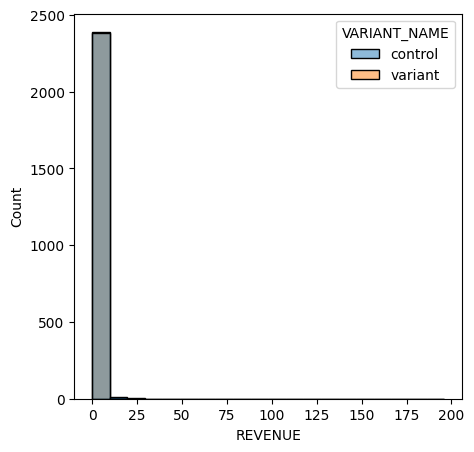

In [141]:
plt.figure(figsize=(5, 5))
sns.histplot(data=File, x='REVENUE', bins=20, hue='VARIANT_NAME');

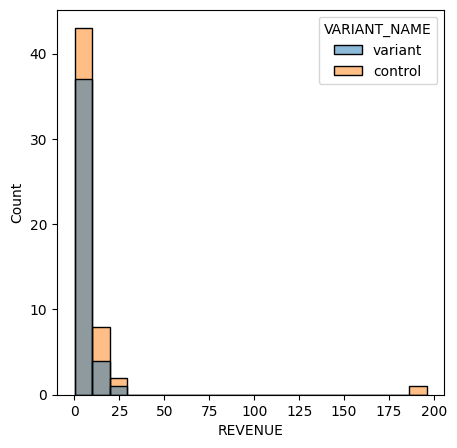

In [142]:
plt.figure(figsize=(5, 5))
sns.histplot(data=File[File['conversion']==1], x='REVENUE', bins=20, hue='VARIANT_NAME');

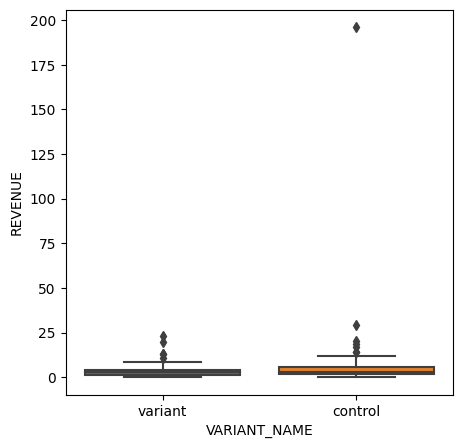

In [143]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=File[File['conversion']==1], y='REVENUE', x='VARIANT_NAME');

Группа В показывает низкие резульаты в сравнении с группой А.

In [146]:
alpha = 0.05
pvalue = stats.shapiro(File['REVENUE'])[1]
print('Distribution is ' + ['','not'][pvalue < alpha] + ' normal')

Distribution is not normal


In [147]:
stats.mannwhitneyu(x=A['REVENUE'].values, y=B['REVENUE'].values)

MannwhitneyuResult(statistic=2874161.0, pvalue=0.2104875008271777)

In [148]:
M1, M2 = A['REVENUE'].mean(), B['REVENUE'].mean()
D1, D2 = A['REVENUE'].var(), B['REVENUE'].var()

In [149]:
effect_size = (M1-M2)/np.sqrt(((n1-1)*D1 + (n2-1)*D2)/(n1+n2-2))
effect_size

0.04050088556526385

In [150]:
analysis = TTestIndPower()
analysis.solve_power(effect_size=effect_size, alpha=alpha, power=None, nobs1=n1, ratio=n2/n1)

0.2882177037329569

Из-за недостаточного объема выборки, получена статистически незначительную разницу.

Рекомендации:
1.Проверить систему сплитования трафика.
2.Проверить длительность теста, учитывая окно конверсии.
3.Рассчитать требуемый размер выборки и избегать преждевременной остановки теста.

Итог:
Не вводить изменения, на которых происходило тестирование группы B.
Рекомендуется уточнить или изменить дизай для нового запуска теста.
